In [ ]:
## Netflix-style Recommendation Engine

## What is a Recommendation Engine?
A Recommendation Engine (or Recommender System) is a machine learning system that suggests items to users based on their interests, behavior, or preferences.

Think of it like:
A smart assistant that learns what you like and says,
“Hey, you might enjoy this movie/book/video!”


Types of Recommendation Engines:
Type	                                Example
Content-based                     filtering	“Because you liked Inception”
Collaborative                     filtering	“Users like you also watched...”
Hybrid models	                  Combination of both

In [ ]:
##Expalin the types of recommdentation system
# 1. Content-Based Filtering
Logic: Recommends items similar to what the user liked in the past, based on item features (e.g., genre, cast, keywords).

How it works: Uses features like movie genre, description, or tags to find similarity.

Example:
If you liked a sci-fi movie like Interstellar, it recommends other sci-fi movies.

Technique: Uses TF-IDF, cosine similarity, etc.

#2. Collaborative Filtering
Logic: Recommends items based on what similar users liked (user behavior only, not item features).

There are two types:

a. User-User Collaborative Filtering
Finds users similar to you and recommends what they liked.

Example: If User A and B have similar taste, and B liked Inception, then A gets Inception as a recommendation.

b. Item-Item Collaborative Filtering
Recommends items that are similar based on user interactions.

Example: People who liked Titanic also liked The Notebook.

Technique: Uses similarity (cosine, Pearson), ratings matrix.

#3. Matrix Factorization
Logic: Breaks down the user-item matrix to find hidden patterns (latent factors like "romance", "action", etc.)

Example: SVD (Singular Value Decomposition) learns hidden preferences.

Library: Surprise, Scikit-learn (TruncatedSVD)

Used in: Netflix Prize competition

#4. Hybrid Recommendation Systems
Logic: Combines two or more methods (e.g., content + collaborative).

Example: Netflix uses hybrid methods — recommends based on genre + what similar users liked.

Advantage: More accurate, solves cold start and sparsity problems.

#5. Knowledge-Based Recommendation
Logic: Uses specific rules or constraints set by the user (not learned from data).

Example: A travel site recommends hotels based on location, price, and amenities selected by the user.



In [ ]:
## Why Companies Use Recommendation Engines
🎯 Personalization
Users get content or products that match their personal interests.

⏳ Saves User Time
Reduces the need to manually search for content — faster discovery.

📈 Increases Engagement
Users spend more time watching, browsing, or shopping.

💰 Boosts Revenue
More views or purchases mean higher ad revenue or sales.

📊 Smart Use of User Data
Uses behavior patterns to make intelligent and personalized suggestions.

In [ ]:
They Use Recommender Systems For:
       Sector	                                  Recommender Use
🎬 Entertainment	                       Suggest movies, shows, music, or videos
🛒 E-Commerce	                           Recommend products, combos, or deals
📱 Social Media	                           Suggest friends, posts, followers, content
🎓 EdTech	                               Recommend courses or learning paths
🍔 Food/Travel	                           Recommend restaurants, dishes, hotels

In [ ]:
#Import libraries

import numpy as np
import pandas as pd
from datetime import datetime, timedelta  
import seaborn as sns
import matplotlib.pyplot as plt
#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Load the dataset
#ratings
rating=pd.read_csv('ratings.csv')
#movies
movie=pd.read_csv('movies.csv')

#merge the data
df=pd.merge(rating,movie, on='movieId')
print(df.head())

In [ ]:
# Exploratory Data Analysis(EDA)
print(df.isnull().sum())
#check infomation 
print(df.info())
#summary of statistics 
print(df.describe())

#Rating Distribution
rating_count=rating['rating'].value_counts().sort_index()
print(rating_count)

#visualaization of rating 
# Bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=rating_count.index, y=rating_count.values, palette='viridis')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
#Top 10 rated movies
top_rating=df.groupby('title')['rating'].count().sort_values(ascending=False)
print('Top 10 rating movies are:',top_rating.head(10))

#Find which 3 movies got the highest number of ratings.
top_ratings=df.groupby('title')['rating'].count().sort_values(ascending=False)
print('Top 10 rating movies are:',top_rating.head(3))

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_ratings.values, y=top_ratings.index, palette='coolwarm')
plt.title('Top 3 Most Rated Movies', fontsize=14)
plt.xlabel('Number of Ratings', fontsize=12)
plt.ylabel('Movie Title', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Top 10 rating movies are: title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: rating, dtype: int64
Top 10 rating movies are: title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Name: rating, dtype: int64


In [ ]:
#Avgerage rating per movie
avg_rating=df.groupby('title')['rating'].mean().sort_values(ascending=False)
print('Avgerage rating per movie:',avg_rating.head(10))

#Find movies with highest average rating (must be rated at least 5 times).
# Filter out movies rated less than 5 times
movie_counts = df.groupby('title')['rating'].count()
popular_movies = movie_counts[movie_counts >= 5].index

# Now get average rating of only those popular ones
best_rated = df[df['title'].isin(popular_movies)].groupby('title')['rating'].mean().sort_values(ascending=False).head(3)
print(best_rated)

In [ ]:
#Recommend Top Movies for Any User
#Task:
#Ask user for their name (like User2),
#Show 3 top-rated movies that user hasn’t seen.
#Logic: Pick similar movies using average scores, skip already watched.


# Ask user for input (e.g., User 2)
user_id = int(input("Enter userId (e.g., 2): "))

#Write Python Function for Recommendation
## Step 1: Get movieIds the user has already rated
# Step 2: Get movies the user has NOT rated

def get_unseen_movies(user_id):
    seen_movies = df[df['userId'] == user_id]['movieId'].unique()
    unseen_df = df[~df['movieId'].isin(seen_movies)]
    return unseen_df

# Step 3: Calculate average rating of unseen movies
# Step 4: Recommend top 3 highest-rated unseen movies
def recommend_movies(user_id):
    unseen_df = get_unseen_movies(user_id)
    avg_rating = unseen_df.groupby('title')['rating'].mean()
    top3 = avg_rating.sort_values(ascending=False).head(3)
    print(f"\nTop 3 recommended movies for User {user_id}:\n")
    print(top3)
# Now call the function
recommend_movies(user_id)

In [ ]:
#Add Genre Filtering
def recommend_by_genre(user_id, genre):
    unseen_df = get_unseen_movies(user_id)
    #Filter movies by genre
    genre_df = unseen_df[unseen_df['genres'].str.contains(genre, case=False, na=False)]
    #Group by title and calculate average rating
    avg = genre_df.groupby('title')['rating'].mean().sort_values(ascending=False).head(3)
    print(f"\nTop 3 {genre} Movies for User {user_id}:\n")
    print(avg)
#now call the function
recommend_by_genre(user_id,genre)

userId
1    232
2     29
3     39
4    216
5     44
Name: rating, dtype: int64


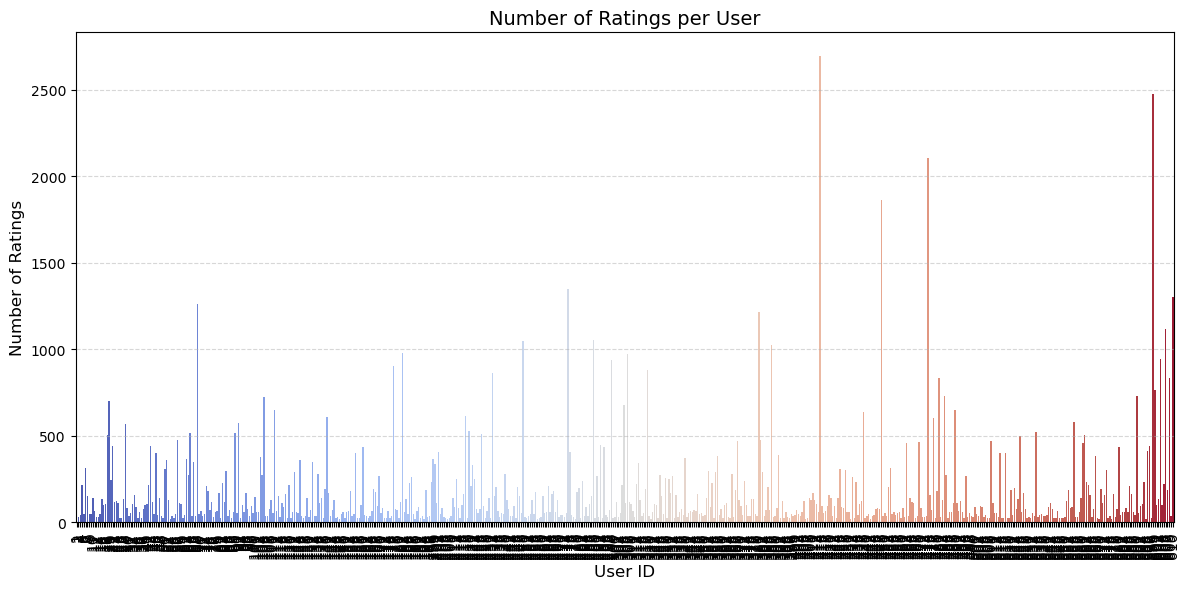

In [11]:
#Show Ratings Per User
#Count how many movies each user rated.
#Show bar graph of userId vs number of ratings

# Step 1: Count number of ratings per user
user_rating_count = df.groupby('userId')['rating'].count()

# Step 2: Show result
print(user_rating_count.head())  # shows first few users

# Step 3: Visualize it using bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=user_rating_count.index, y=user_rating_count.values, palette='coolwarm')
plt.title('Number of Ratings per User', fontsize=14)
plt.xlabel('User ID', fontsize=12)
plt.ylabel('Number of Ratings', fontsize=12)
plt.xticks(rotation=90)  # rotate x-labels for clarity
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show(block=False)

In [ ]:
# Build Final Mini Project
def run_netflix_recommender():
    try:
        user_id = int(input("Enter your userId: "))
        genre = input("Enter your favorite genre (e.g., Comedy, Action): ")

        recommend_movies(user_id)
        recommend_by_genre(user_id, genre)
        
        # Show rating distribution again for user experience
        plot_rating_distribution()

    except Exception as e:
        print("Error:", e)

#Add plot_rating_distribution() function
def plot_rating_distribution():
    rating_count = df['rating'].value_counts().sort_index()
    plt.figure(figsize=(8, 5))
    sns.barplot(x=rating_count.index, y=rating_count.values, palette='viridis')
    plt.title('Rating Distribution')
    plt.xlabel('Rating')
    plt.ylabel('Number of Ratings')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show(block=False)